(5 pts) In 250-500 words, write a thorough explanation in markdown in your notebook of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. You may need to do additional research on this than what exists in the readings.

When to use Machine learning and when not to.. (250-500 words)

There are many times when machine learning is to be used and when it is not to be used. Usually, machine learning should be used when it is not easy to code a simple solution. Machine learning is very useful for finding patterns in large amounts of data. For example, machine learning logistic regression can be utilized to predict if someone has a certain illness based on the other information that is provided. If you were to not use machine learning, it could be impossible to code a prediction of illness due to how intricately the data points interact with each other. Also, doing so could be very time consuming and difficult to sort through large amounts of data. Not all cases need machine learning at all, though. One such case would be if you don’t have a large enough amount of data. If you attempt to use a machine learning model with only a small amount of data, you will likely run into the problem of overfitting. The model could perform well using your small set of data, but would not perform well if it were to be applied outside of the data set. Another time machine learning should not be used if it is simply not necessary. For many projects, you can predict an outcome without needing to train a model on the data. For example, if you wanted to see which soccer team won a game and the amount of goals per team was in the data set, you could simply find that the winning team was the team that had more goals.

In [7]:
# Perform pre processing on the data set

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

def preprocessing():

    titanic_df = pd.read_csv('titanic.csv')

    #Drop columns that machine learning will not be using
    columns = ['Ticket','Cabin','Name','Embarked']


    titanic_df = titanic_df.drop(columns, axis=1)

    # Interpolate values for the missing Age and Fare values

    titanic_df['Age'] = titanic_df['Age'].interpolate()

    titanic_df['Fare'] = titanic_df['Fare'].interpolate()

    titanic_df.info()

    # Drop rows that have missing values

    titanic_df = titanic_df.dropna()

    # Convert Sex to numerical values

    sex_map = {'male':0,'female':1}
    titanic_df['Sex'] = titanic_df['Sex'].map(sex_map)
    titanic_df

preprocessing()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000
887,888,1,1,1,19.0,0,0,30.0000
888,889,0,3,1,22.5,1,2,23.4500
889,890,1,1,0,26.0,0,0,30.0000


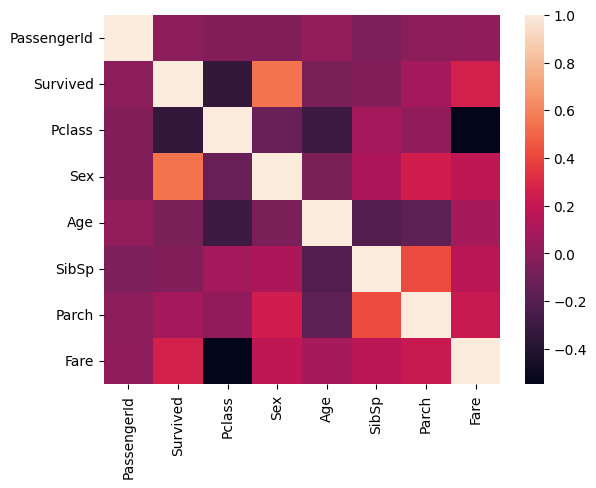

In [8]:
# Create a correlation matrix with a heatmap for the features.
 # Use markdown to write about your takeaways in under 200 words. Perform feature selection from this. You should likely not be selecting more than 10 features. 
def titanic_heatmap():

    sns.heatmap(titanic_df.corr())

titanic_heatmap()

My takeaway from this correlation matrix is that the two sets of data with the strongest correlation are Sex and Survived. Another one of my takeaways is that correlation matrixes can be a helpful visualization to see which pieces of data correlate with eachother, especially if you are trying to find which values correlate with a specific outcome (Which data most explains whether or not the person survived or not, for example.)

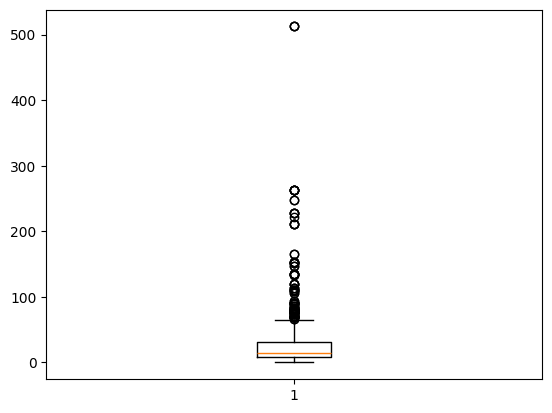

In [9]:
#  Create a box and whisker plot for loan_amounts if using the Lending Club dataset and fare if using the Titanic dataset. 
# How do you handle the null values? What does this box and whisker plot show you?

def fare_boxplot():
 
    fare_df = titanic_df['Fare']
 


    plt.boxplot(fare_df)
 
    plt.show()
fare_boxplot()

# This box and whisker plot shows me the volume of certain pricing for the Titanic fare.

# I handled the null values by interpolating them during pre processing.

In [6]:
! python -m pip install realpython-reader

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/56.5 kB ? eta -:--:--
     ---------------------------------------- 56.5/56.5 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/81.3 kB ? eta -:--:--
   ------------------------------ ------


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
# If using the Titanic dataset: create a new column called age_bin that groups people into at least 4 age ranges. 
#Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in markdown. 
#(use a timer to determine performance: check useful references below to see how timers work) 
import time

def agebin_1():
    time1 = time.perf_counter()
    titanic_df['age_bin'] = titanic_df['Age'].apply(lambda x: 'Child' if x <= 12 else ('Teenager' if x<= 17 else ('Adult' if x <= 65 else 'Senior')))
    time2 = time.perf_counter()
    print("The lambda code ran in",time2 - time1,'seconds')
def agebin_2():
    timeA = time.perf_counter()
    ages = [0, 13, 18, 65, 200]
    grouping = ['Child', 'Teenager', 'Adult','Senior']
    titanic_df['age_bin'] = pd.cut(titanic_df['Age'], bins=ages, labels=grouping, right=False)
    timeB = time.perf_counter()
    print('The non lambda code ran in',timeB - timeA,'seconds')
agebin_1()
agebin_2()





The lambda code ran in 0.0019254999999986921 seconds
The non lambda code ran in 0.0034094999999751963 seconds


My finding is that the first code using the lambda was more performant. This is because it ran in ~0.001 seconds while the other method ran in ~0.004 seconds.

C:\Users\aga20\AppData\Local\Temp\ipykernel_19252\1638892816.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.hist('Fare', by='age_bin')


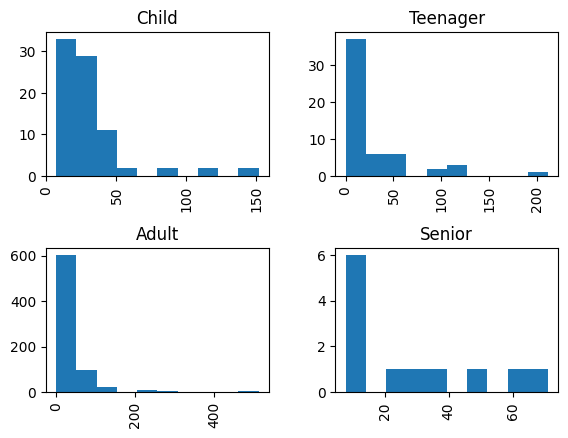

In [11]:

#If using the Titanic dataset, create subplot histograms to show how fares differ by age_bin. 
#Summarize your findings in under 200 words.

#plt.subplot(titanic_df['Fare','age_bin'])
#df_columns = titanic_df.columns()
# columns = titanic_df.columns( 'age_bin','Fare'])
#columns1 = ['age_bin','Fare']
# plt.hist(titanic_df)

#new_df = titanic_df['Fare']['age_bin']

# plt.subplot(new_df ,bin)

#plt.hist(titanic_df, columns=columns1,bins=10)


# figs, axs = plt.subplots(nrows=2)
# titanic_df['Fare'].plot(ax=axs[0])
# titanic_df['age_bin'].plot(ax=axs[0])

def subplot():

    titanic_df.hist('Fare', by='age_bin')

subplot()

# x = plt.hist(titanic_df['age_bin'])

# y = plt.hist(titanic_df['Fare'])

# figs, axs = plt.subplots(nrows=2)
# y = plt.hist(titanic_df['age_bin'],bins = 3)
# x = plt.hist(titanic_df['Fare'], bins = 3)
# plt.plot(x,y)

# age_bin = titanic_df['age_bin']

# plt.hist(titanic_df[titanic_df['age_bin'] == age_bin]['Fare'], bins=10)

# plt.xlabel("Fare")
# plt.ylabel("")
# plt.show()



# x = titanic_df['age_bin']
# y = titanic_df['Fare']

# plt.subplot(x,y)

# plt.show()


My finding from these subplot histograms are that the Adults had the most extreme outliers in the data, which likely would make their average Fare price skewed. I also noticed that there were not any seniors who paid more than 80 for their fare, meanwhile the other age groups had some people paying much higher fares than that.